# :)

In [1]:
import pandas as pd
import glob
import os

# Path to the folder containing CSV files
folder_path = r'C:\Users\Atena\Documents\csv_files'

# Get all CSV file paths in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Define the target labels to check against
target_labels = ['bckg', 'seiz', 'fnsz', 'gnsz', 'spsz', 'cpsz', 'absz', 
                 'tnsz', 'cnsz', 'tcsz', 'atsz', 'mysz', 'nesz']

# Initialize dictionaries for each label
label_dictionaries = {f'{label}_start': [] for label in target_labels}
label_dictionaries.update({f'{label}_stop': [] for label in target_labels})
label_dictionaries.update({f'{label}_dur': [] for label in target_labels})

# Loop over each CSV file and process it
for file_path in csv_files:
    # Load the CSV file, skipping the commented lines
    df = pd.read_csv(file_path, comment='#')
    
    # Convert label column to lowercase for case-insensitive matching
    df['label'] = df['label'].str.lower()
    
    # Filter the rows that match the target labels
    matching_df = df[df['label'].isin(target_labels)]
    
    # Calculate the time differences (stop_time - start_time)
    matching_df['time_diff'] = matching_df['stop_time'] - matching_df['start_time']
    
    # Process each label and add the unique sorted values to the corresponding dictionaries
    for label in target_labels:
        label_data = matching_df[matching_df['label'] == label]
        
        # Extract and sort unique start, stop, and duration values
        unique_start = sorted(set(label_data['start_time']))
        unique_stop = sorted(set(label_data['stop_time']))
        unique_dur = sorted(set(label_data['time_diff']))
        
        # Append the unique values to the respective dictionaries
        label_dictionaries[f'{label}_start'].extend(unique_start)
        label_dictionaries[f'{label}_stop'].extend(unique_stop)
        label_dictionaries[f'{label}_dur'].extend(unique_dur)

# Ensure all lists in the dictionaries are unique and sorted
for key in label_dictionaries:
    label_dictionaries[key] = sorted(set(label_dictionaries[key]))

# Print the final dictionaries
for key, value in label_dictionaries.items():
    print(f"{key}: {value}")


bckg_start: [0.0, 0.0011, 0.0022, 0.0027, 0.0033, 0.0038, 0.0044, 0.0054, 0.0055, 0.0059, 0.0082, 0.0083, 0.0101, 0.0109, 0.0115, 0.0136, 0.0153, 0.0163, 0.0166, 0.0167, 0.0178, 0.019, 0.0202, 0.0218, 0.0219, 0.0249, 0.0304, 0.0328, 0.0332, 0.0335, 0.0354, 0.0405, 0.0435, 0.049, 0.0506, 0.0517, 0.0558, 0.0571, 0.0607, 0.0656, 0.0667, 0.068, 0.0709, 0.081, 0.0911, 0.1113, 0.1115, 0.1215, 0.1313, 0.1316, 0.1417, 0.1619, 0.1721, 0.1822, 0.1923, 0.2024, 0.2126, 0.2227, 0.2632, 0.2834, 0.6478, 1.002, 3.0245, 3.0744, 3.091, 3.1021, 3.728, 4.0101, 4.4586, 4.4917, 4.8729, 4.9558, 5.0101, 5.0279, 5.0707, 5.1171, 5.3868, 5.4531, 5.5194, 5.864, 5.9835, 6.0, 6.8875, 7.0, 7.3188, 7.325, 7.4095, 7.4922, 7.4928, 7.5427, 7.5469, 7.5898, 7.5971, 7.6193, 7.6471, 7.6637, 7.6804, 9.0635, 9.4988, 9.9443, 10.8992, 10.9556, 11.0222, 11.0388, 11.044, 11.0909, 11.168, 12.0078, 12.016, 12.4827, 13.1515, 13.2441, 14.0221, 14.0225, 14.1381, 14.1818, 14.4353, 14.7265, 14.7546, 14.7896, 14.7966, 14.7993, 14.8713, 1

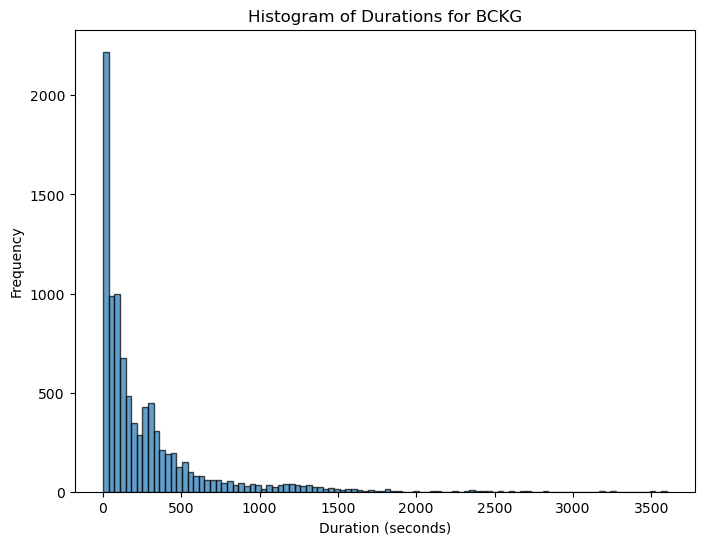

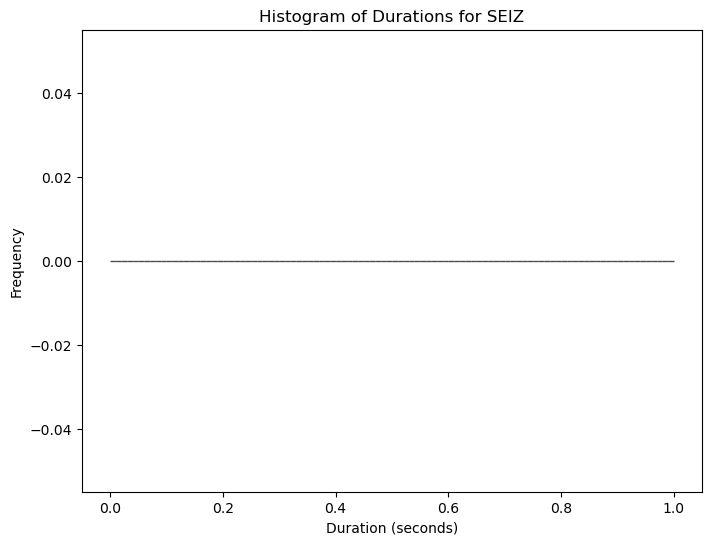

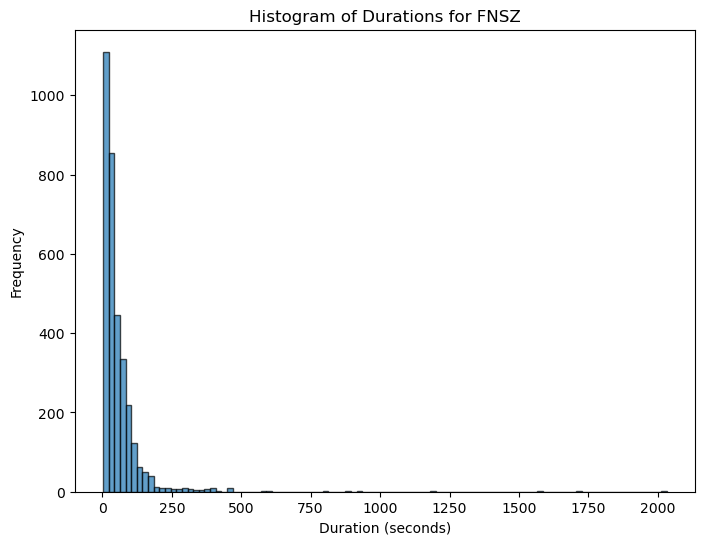

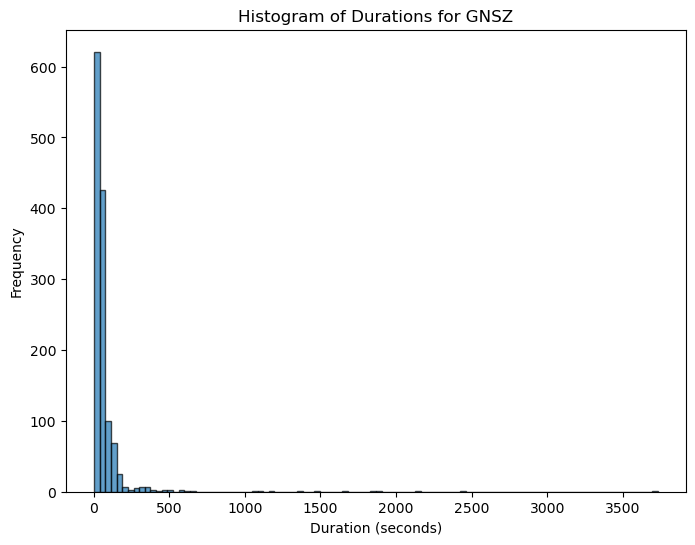

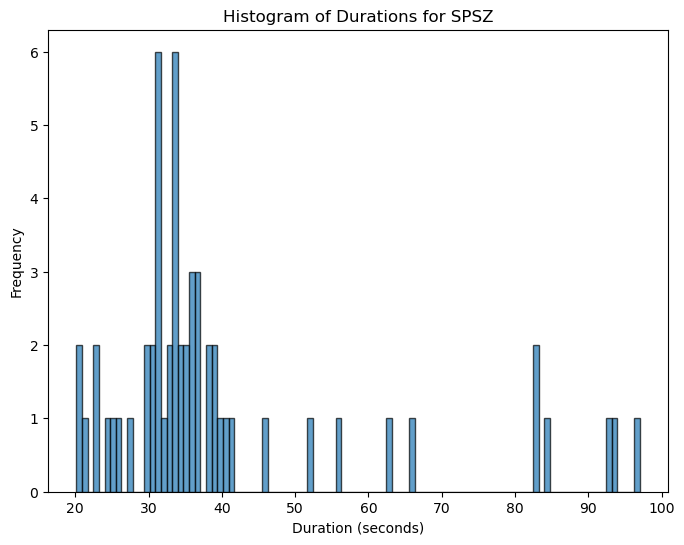

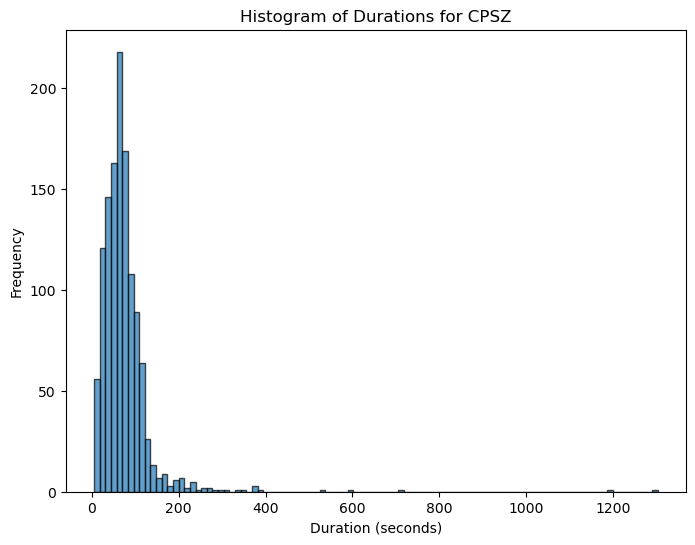

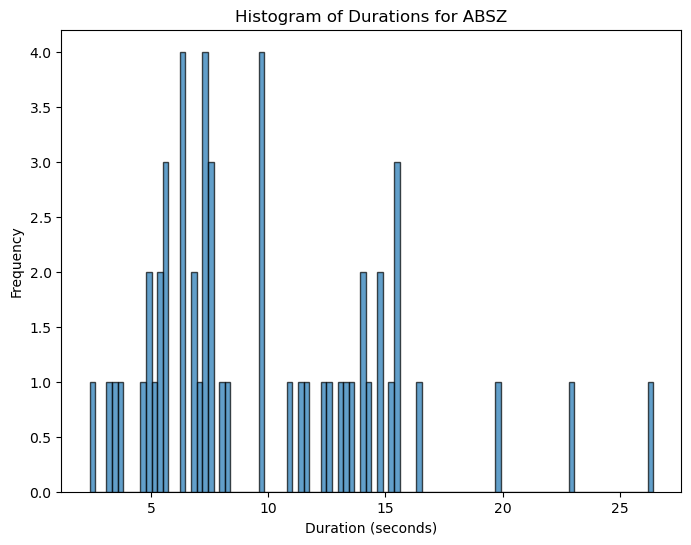

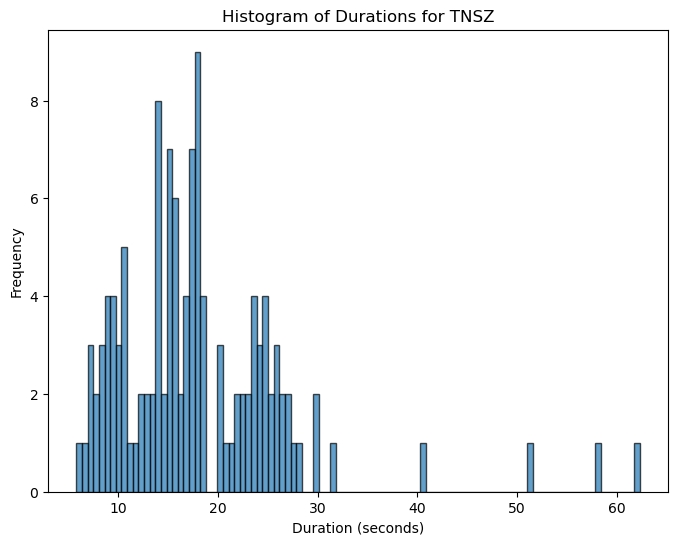

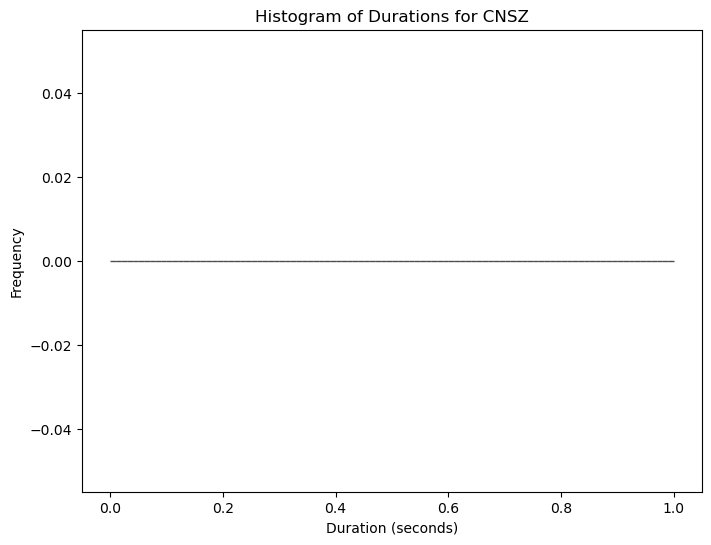

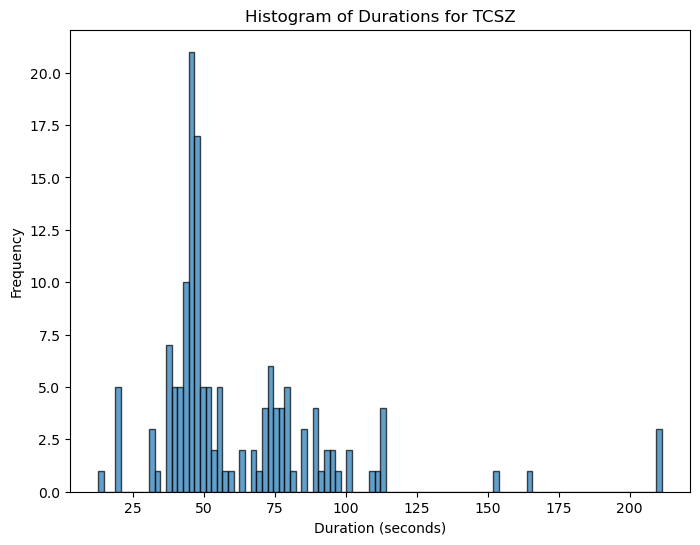

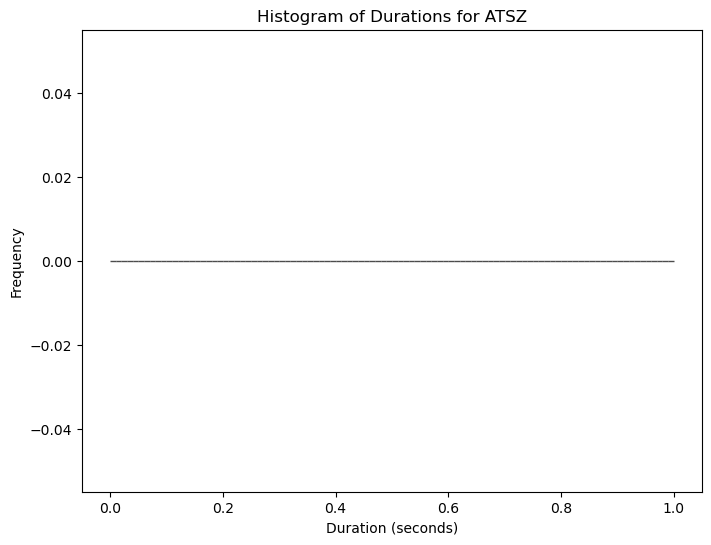

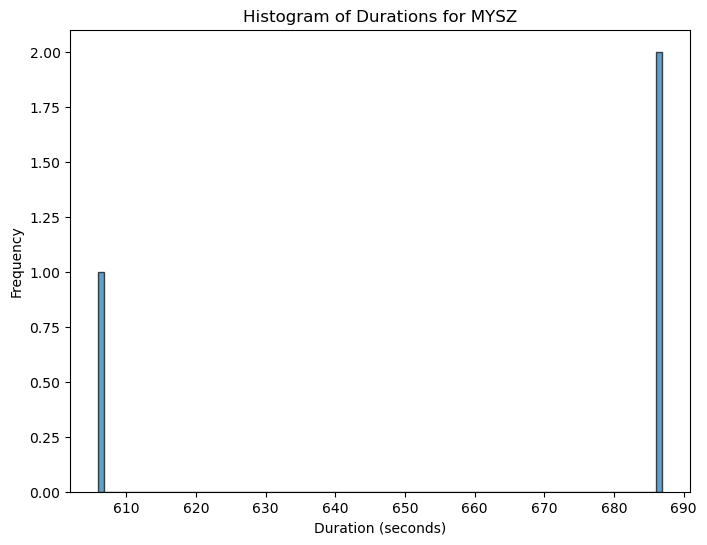

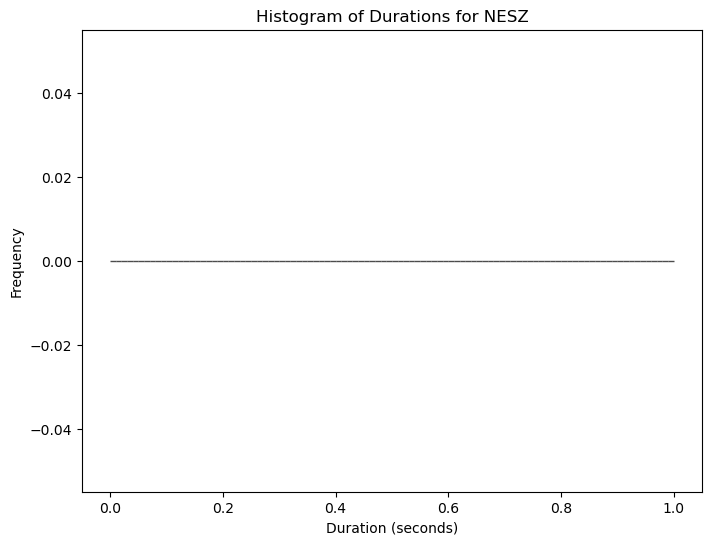

In [7]:
import matplotlib.pyplot as plt

# Define the target labels
target_labels = ['bckg', 'seiz', 'fnsz', 'gnsz', 'spsz', 'cpsz', 'absz', 
                 'tnsz', 'cnsz', 'tcsz', 'atsz', 'mysz', 'nesz']

# Loop through each label and plot the histogram of start, stop, and duration values
for label in target_labels:
    # Extract the start, stop, and duration values for this label from the dictionary
    duration_values = label_dictionaries[f'{label}_dur']
    
    # Plot the histogram for durations
    plt.figure(figsize=(8, 6))
    plt.hist(duration_values, bins=100, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Durations for {label.upper()}')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()


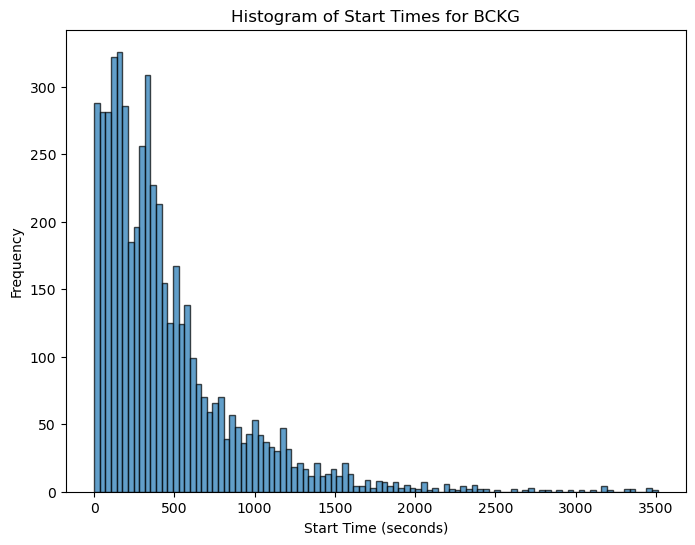

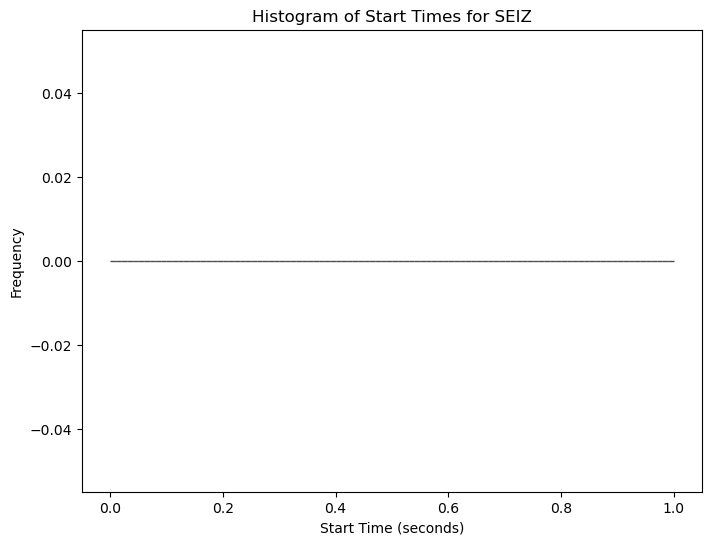

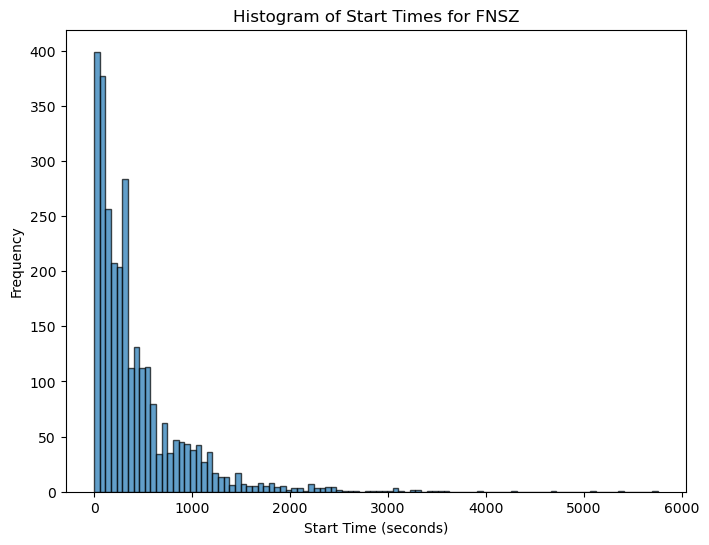

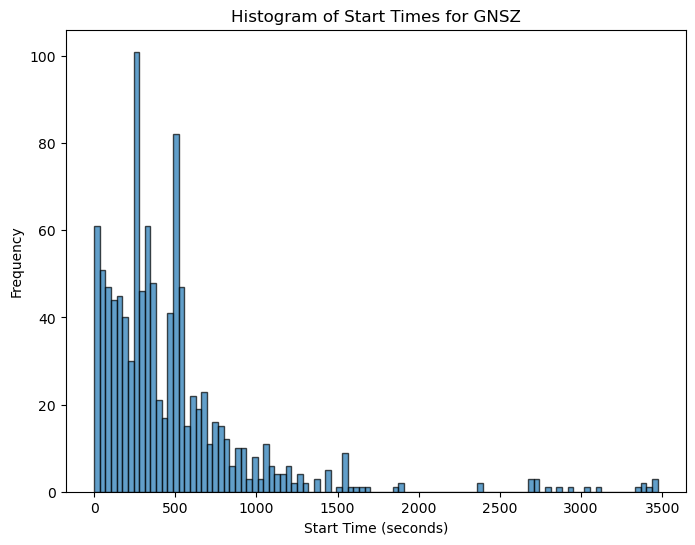

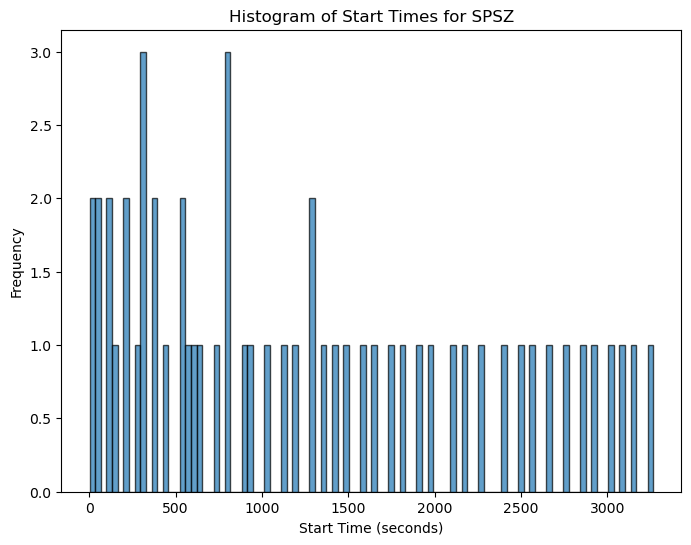

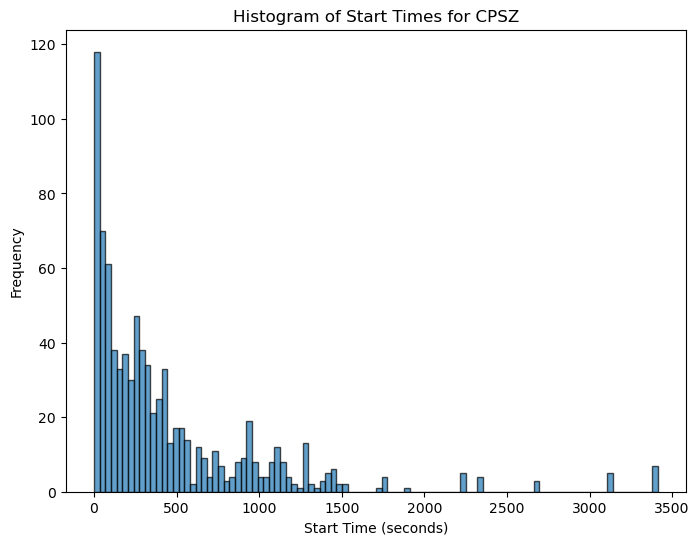

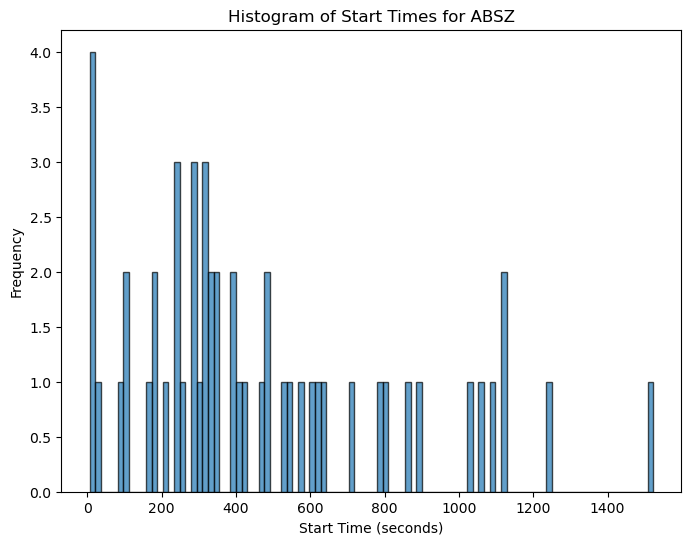

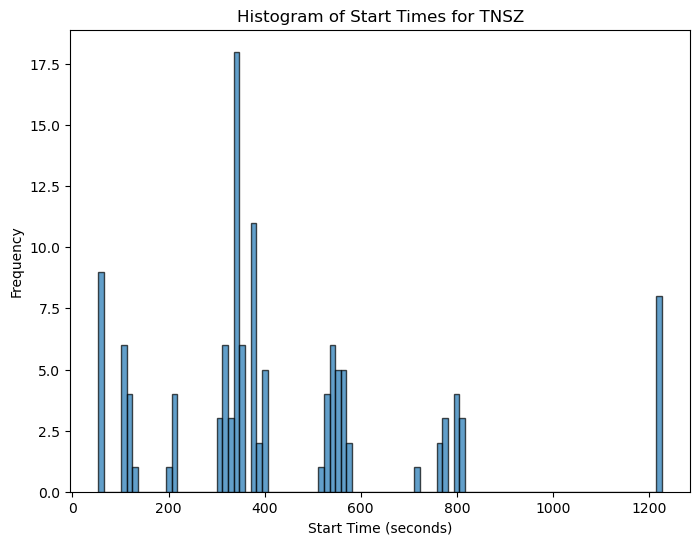

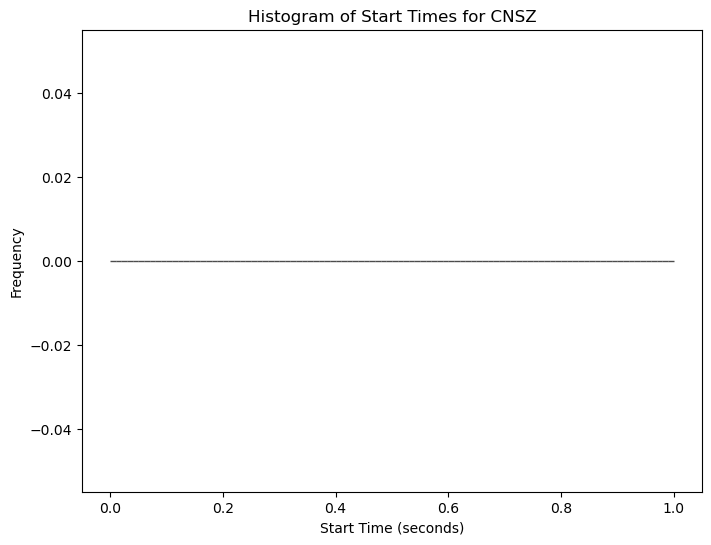

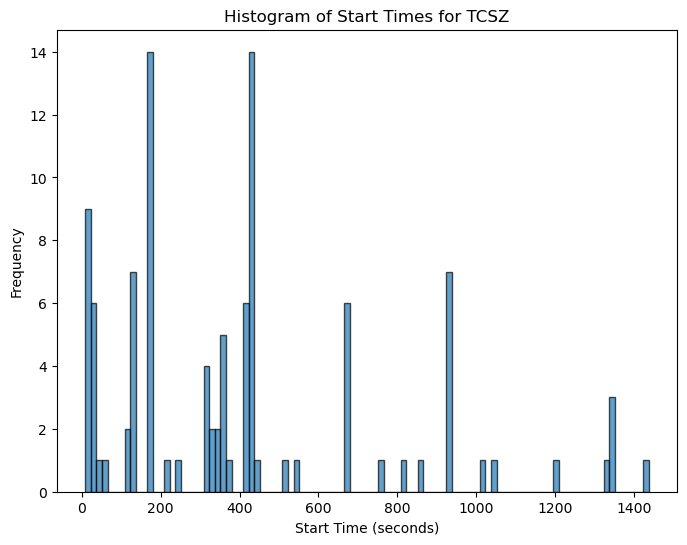

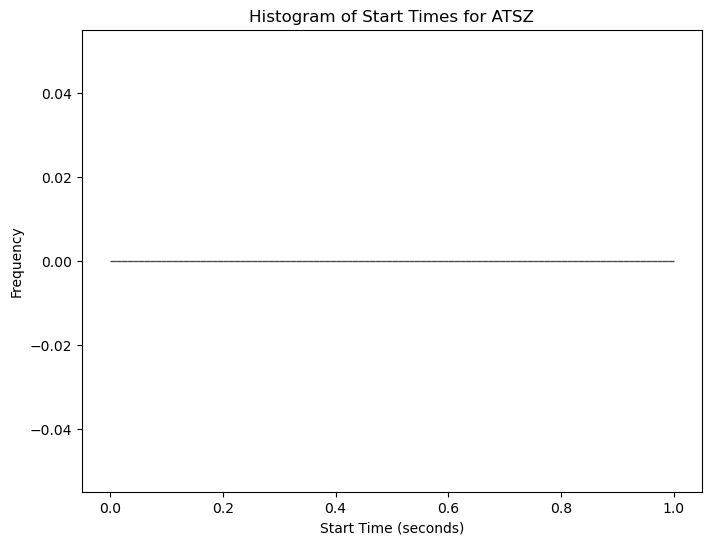

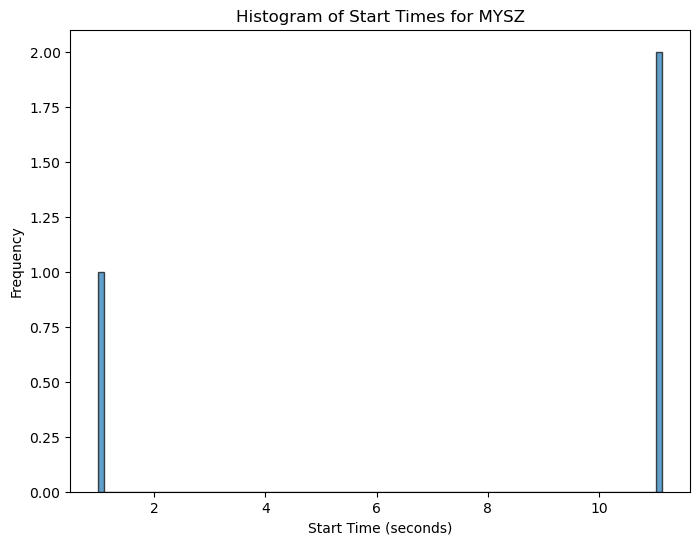

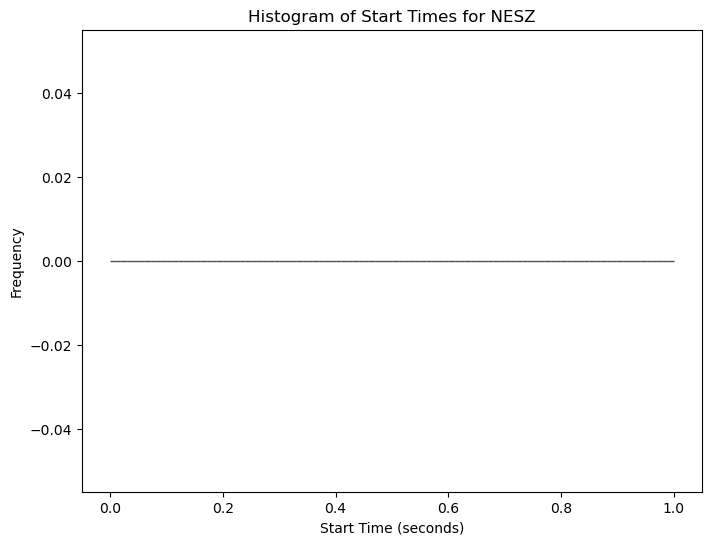

In [8]:
# Loop through each label and plot the histogram of start, stop, and duration values
for label in target_labels:
    # Extract the start, stop, and duration values for this label from the dictionary
    start_values = label_dictionaries[f'{label}_start']
    
    # Plot the histogram for start times
    plt.figure(figsize=(8, 6))
    plt.hist(start_values, bins=100, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Start Times for {label.upper()}')
    plt.xlabel('Start Time (seconds)')
    plt.ylabel('Frequency')
    plt.show()

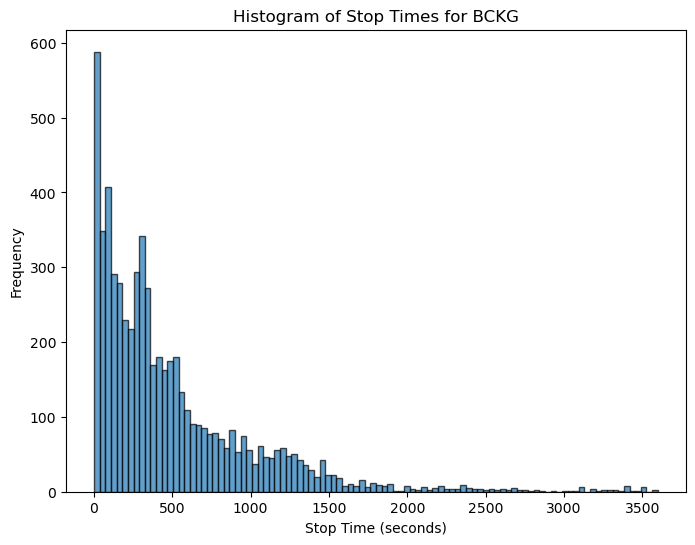

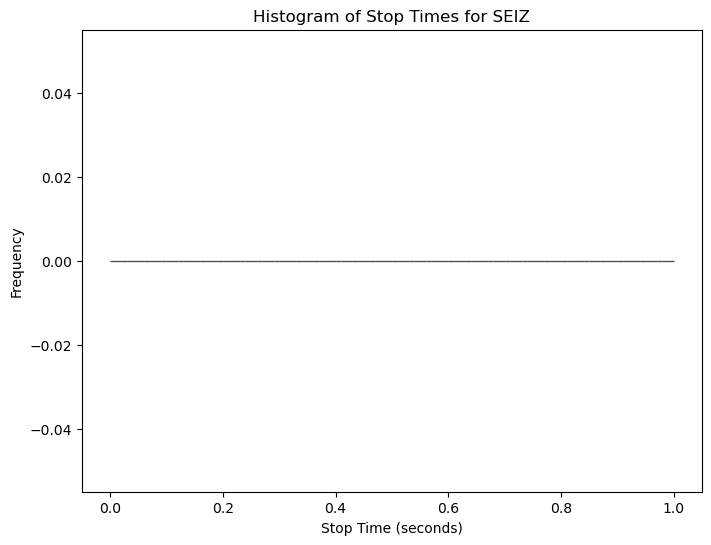

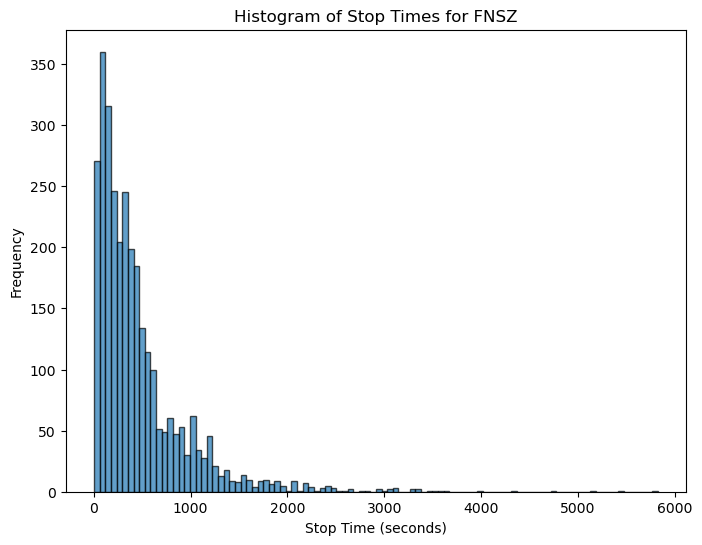

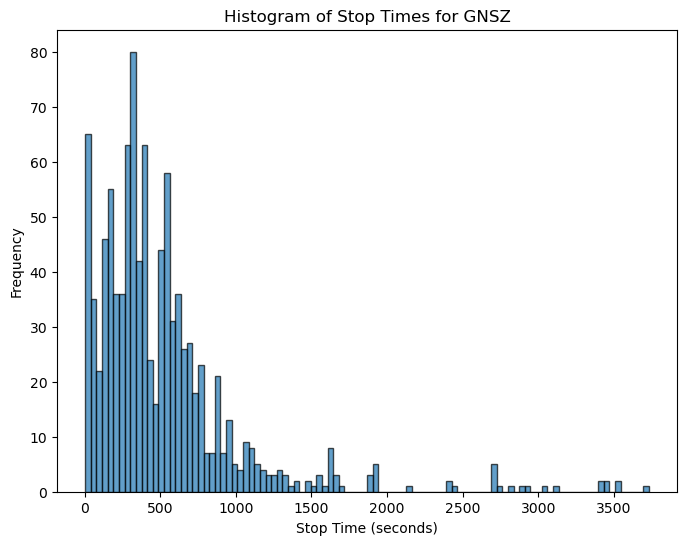

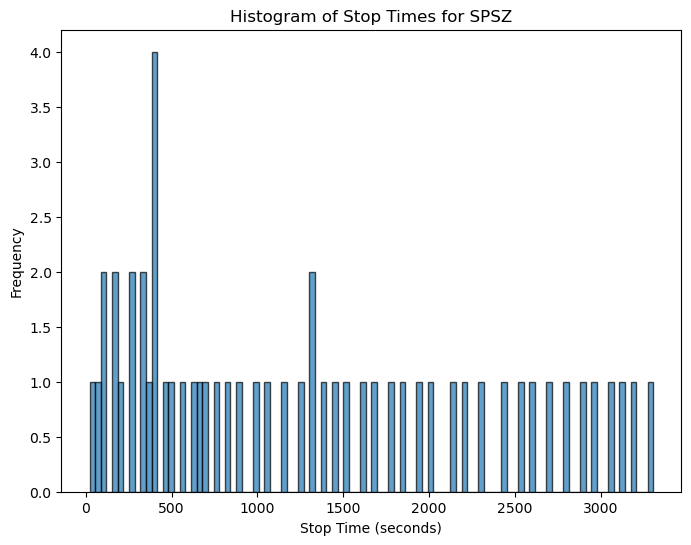

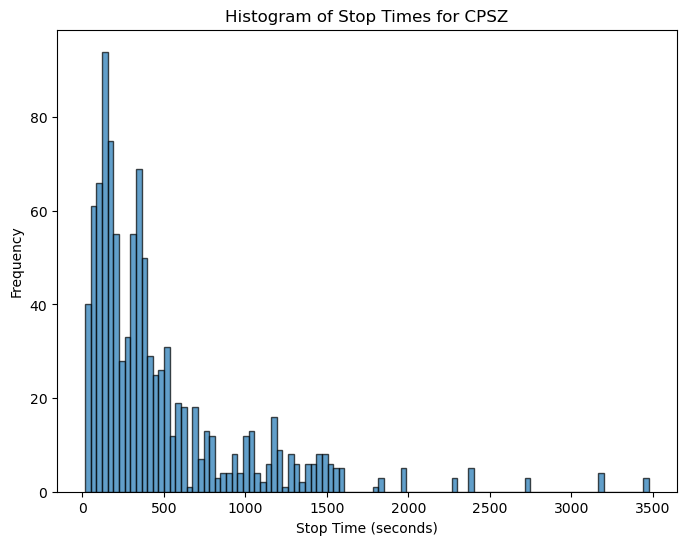

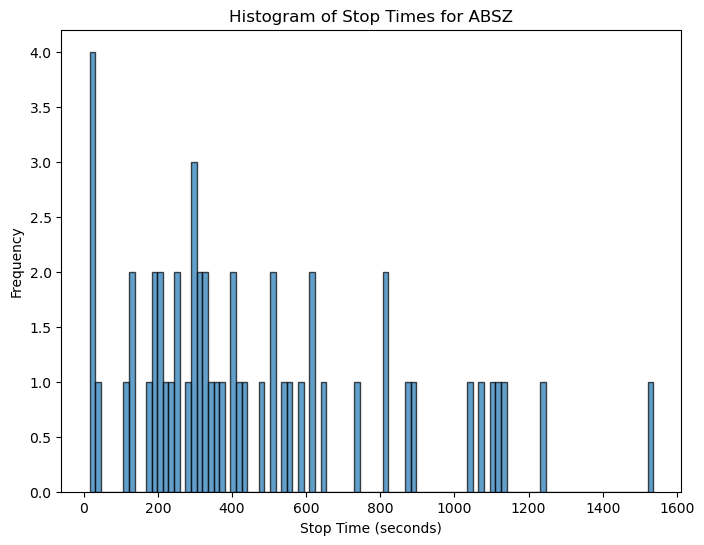

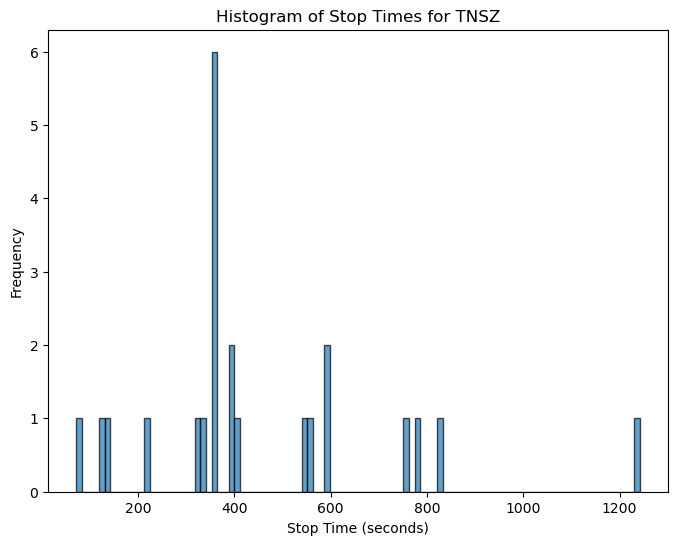

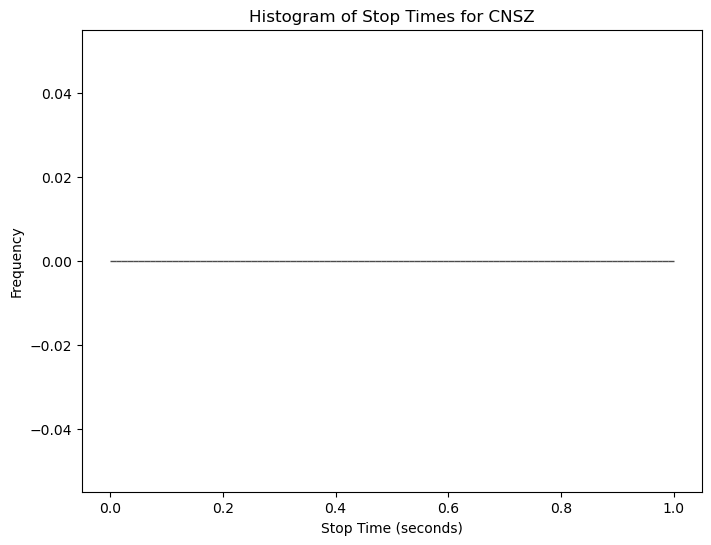

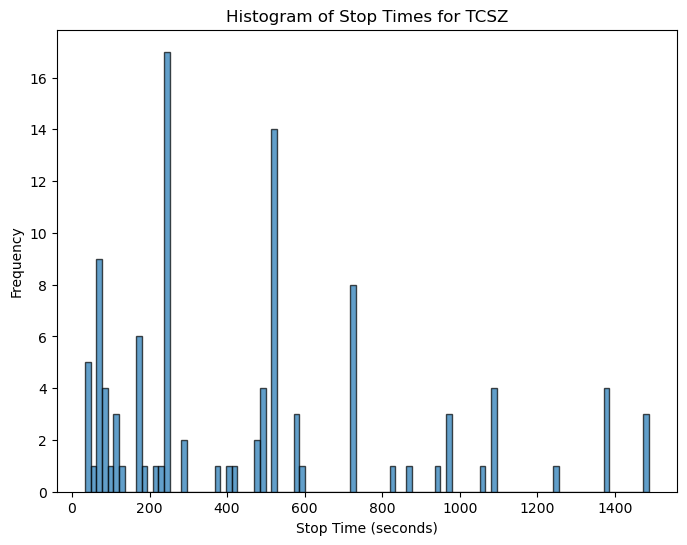

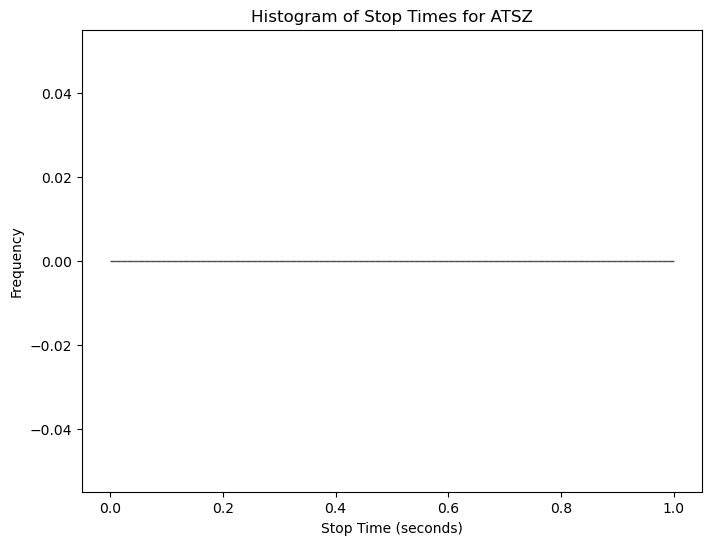

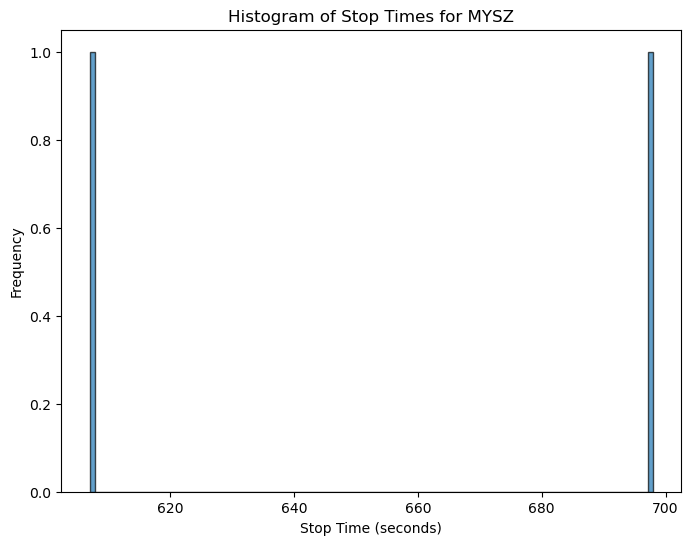

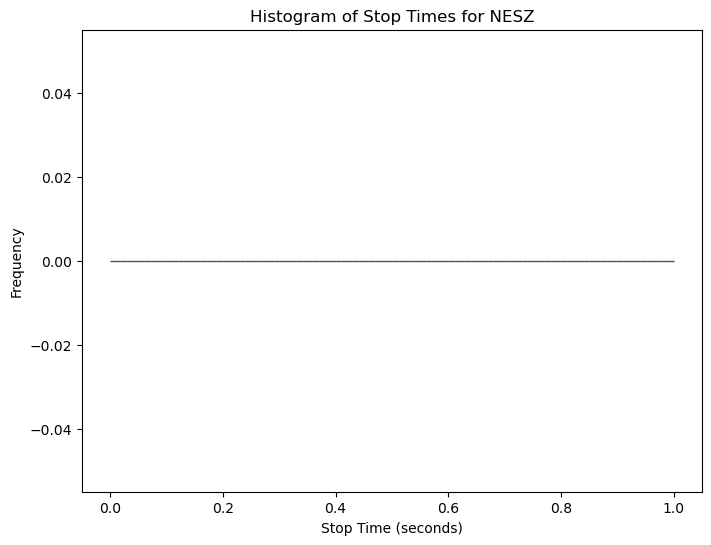

In [9]:
# Loop through each label and plot the histogram of start, stop, and duration values
for label in target_labels:
    # Extract the start, stop, and duration values for this label from the dictionary
    stop_values = label_dictionaries[f'{label}_stop']
    
    # Plot the histogram for stop times
    plt.figure(figsize=(8, 6))
    plt.hist(stop_values, bins=100, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Stop Times for {label.upper()}')
    plt.xlabel('Stop Time (seconds)')
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# Define the target labels
target_labels = ['bckg', 'seiz', 'fnsz', 'gnsz', 'spsz', 'cpsz', 'absz', 
                 'tnsz', 'cnsz', 'tcsz', 'atsz', 'mysz', 'nesz']

# Initialize a dictionary to store the counts of unique values for each label
unique_counts = {label: {'start_count': 0, 'stop_count': 0, 'duration_count': 0} for label in target_labels}

# Loop through each label and count unique values for start, stop, and duration
for label in target_labels:
    # Count unique values for start, stop, and duration
    start_count = len(set(label_dictionaries[f'{label}_start']))
    stop_count = len(set(label_dictionaries[f'{label}_stop']))
    duration_count = len(set(label_dictionaries[f'{label}_dur']))
    
    # Store the counts in the dictionary
    unique_counts[label]['start_count'] = start_count
    unique_counts[label]['stop_count'] = stop_count
    unique_counts[label]['duration_count'] = duration_count

# Print the counts of unique values for each label
for label, counts in unique_counts.items():
    print(f"Label: {label.upper()}")
    print(f"  Unique Start Times: {counts['start_count']}")
    print(f"  Unique Stop Times: {counts['stop_count']}")
    print(f"  Unique Durations: {counts['duration_count']}\n")


Label: BCKG
  Unique Start Times: 5117
  Unique Stop Times: 6039
  Unique Durations: 9299

Label: SEIZ
  Unique Start Times: 0
  Unique Stop Times: 0
  Unique Durations: 0

Label: FNSZ
  Unique Start Times: 2855
  Unique Stop Times: 3032
  Unique Durations: 3352

Label: GNSZ
  Unique Start Times: 1039
  Unique Stop Times: 1001
  Unique Durations: 1293

Label: SPSZ
  Unique Start Times: 55
  Unique Stop Times: 54
  Unique Durations: 56

Label: CPSZ
  Unique Start Times: 849
  Unique Stop Times: 1010
  Unique Durations: 1231

Label: ABSZ
  Unique Start Times: 52
  Unique Stop Times: 53
  Unique Durations: 54

Label: TNSZ
  Unique Start Times: 123
  Unique Stop Times: 23
  Unique Durations: 123

Label: CNSZ
  Unique Start Times: 0
  Unique Stop Times: 0
  Unique Durations: 0

Label: TCSZ
  Unique Start Times: 103
  Unique Stop Times: 106
  Unique Durations: 149

Label: ATSZ
  Unique Start Times: 0
  Unique Stop Times: 0
  Unique Durations: 0

Label: MYSZ
  Unique Start Times: 3
  Unique S